In [1]:
import yfinance as yf 
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [33]:
data = yf.download('SPY', '2017-01-30', '2022-11-30') 

[*********************100%***********************]  1 of 1 completed


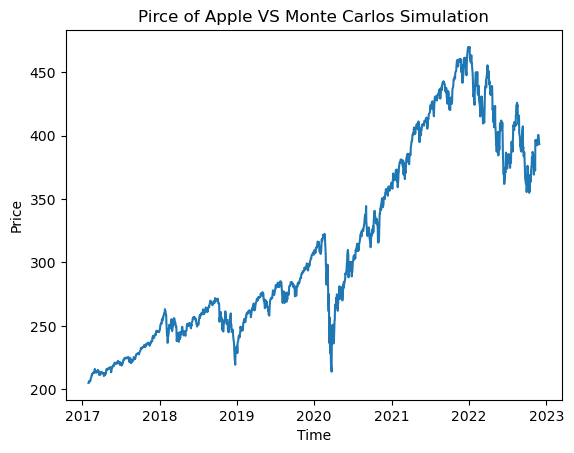

In [34]:
plt.plot()
plt.plot(data.index,data["Adj Close"],label="Price")
plt.xlabel('Time') 
plt.ylabel('Price')
plt.title("Pirce of SPY VS Monte Carlos Simulation")
plt.show()

In [35]:
data['change'] = data['Adj Close'].pct_change()
mu = data['change'][1:].mean() 
sigma = data['change'][1:].std()

In [36]:
#Drop the first one
#data = data.drop(labels=data.index[0], axis=0)
data.drop(columns="Open",axis=1,inplace=True)
data.drop(columns="High",axis=1,inplace=True)
data.drop(columns="Close",axis=1,inplace=True)
data.drop(columns="Volume",axis=1,inplace=True)

data

,Low,Adj Close,change
Date,,,
2017-01-30,226.410004,204.936920,NaN
2017-01-31,226.320007,204.918945,-0.000088
2017-02-01,226.940002,205.000000,0.000396
2017-02-02,226.820007,205.135086,0.000659
2017-02-03,228.460007,206.549072,0.006893
...,...,...,...
2022-11-22,395.149994,398.072052,0.013457
2022-11-23,399.309998,400.580536,0.006302
2022-11-25,401.540009,400.490936,-0.000224


In [50]:
def Create_Monte_Carlo(data):
    for j in range(100):
        model = np.array([data['Adj Close'][0]],dtype=np.float64)
        for i in range(1, 1470):
            old_price = model[i -1] 
            new_price = old_price*(1+ mu) + old_price*sigma*np.random.normal(0,1) 
            model=np.append(model,new_price)
        data["Predicted Price"+str(j)]=model
        
    return data

In [51]:
Create_Monte_Carlo(data)

C:\Users\Kamitsuki\AppData\Local\Temp\ipykernel_13880\2926975157.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  data["Predicted Price"+str(j)]=model
C:\Users\Kamitsuki\AppData\Local\Temp\ipykernel_13880\2926975157.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  data["Predicted Price"+str(j)]=model
C:\Users\Kamitsuki\AppData\Local\Temp\ipykernel_13880\2926975157.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider

,Low,Adj Close,change,Predicted Price,Predicted Price1469,Predicted Price0,Predicted Price1,Predicted Price2,Predicted Price3,Predicted Price4,...,Predicted Price90,Predicted Price91,Predicted Price92,Predicted Price93,Predicted Price94,Predicted Price95,Predicted Price96,Predicted Price97,Predicted Price98,Predicted Price99
Date,,,,,,,,,,,,,,,,,,,,,
2017-01-30,226.410004,204.936920,NaN,204.936920,204.936920,204.936920,204.936920,204.936920,204.936920,204.936920,...,204.936920,204.936920,204.936920,204.936920,204.936920,204.936920,204.936920,204.936920,204.936920,204.936920
2017-01-31,226.320007,204.918945,-0.000088,199.105573,209.405865,206.233752,205.896418,205.378311,200.246008,205.798914,...,206.660715,204.686869,208.242924,205.887352,201.664555,205.934242,206.472683,203.891647,207.090639,206.420231
2017-02-01,226.940002,205.000000,0.000396,191.800303,210.741268,207.444715,204.447881,205.536552,200.104357,207.736919,...,207.544019,202.073156,211.613357,205.452173,197.207663,205.699577,203.129598,207.909288,208.766418,211.250594
2017-02-02,226.820007,205.135086,0.000659,191.328132,216.563709,208.597034,201.931521,208.677922,199.163005,207.024364,...,205.013136,202.551679,211.519349,205.773526,201.379786,207.127267,203.932341,204.329107,209.626220,212.581104
2017-02-03,228.460007,206.549072,0.006893,192.983497,215.497453,206.585293,203.898212,210.300736,193.723196,205.980991,...,205.242321,204.913827,215.867127,206.740895,203.666036,207.300454,206.307963,200.135777,212.255518,206.062871
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-11-22,395.149994,398.072052,0.013457,212.129966,598.022296,224.832304,336.774042,483.382455,515.518756,240.976043,...,329.678903,231.748038,565.167659,252.454698,373.279800,416.805733,1425.705216,570.886775,296.976419,526.589949
2022-11-23,399.309998,400.580536,0.006302,211.712564,600.666207,223.743113,331.276102,481.310373,525.528965,240.039069,...,326.810775,237.756105,575.936563,253.102613,373.900264,418.049085,1438.778620,567.894601,299.235945,532.789070
2022-11-25,401.540009,400.490936,-0.000224,210.276613,614.329170,222.186784,336.879603,475.523783,532.868950,239.193203,...,321.271613,240.191112,575.970255,253.701737,376.149699,420.982513,1419.753606,556.698670,295.275996,539.865865


Text(0.5, 1.0, 'Monte Carlo Simulation of SPY (5 years)')

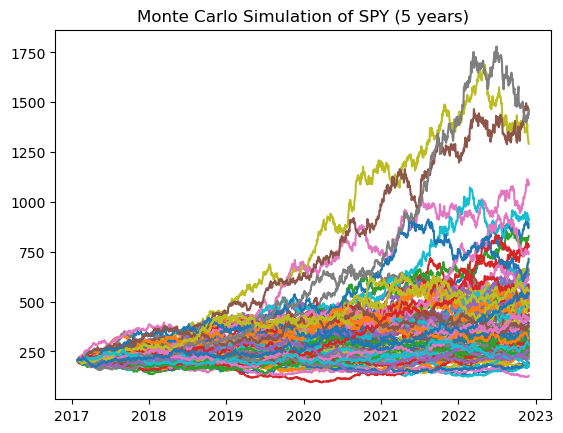

In [61]:
plt.plot(data.index,data["Adj Close"],label="Price")
for j in range(100):
    plt.plot(data.index,data["Predicted Price"+str(j)],label="Predicted Price"+str(j))
plt.title("Monte Carlo Simulation of SPY (5 years)")

In [59]:
plt.clf()

<Figure size 640x480 with 0 Axes>

In [168]:
data = yf.download('TSLA', '2017-05-27', '2022-12-17') 

[*********************100%***********************]  1 of 1 completed


In [169]:
len(data)

1400

In [173]:
def Create_Monte_Carlo_rolling(data,rolling,num_predicted_day):
    data['change'] = data['Adj Close'].pct_change()
    count=0
    for j in range(100):
        # Base case
        model = np.array([data['Adj Close'][0]],dtype=np.float64)
        for h in range(rolling-1):
            model = np.append(model,data['Adj Close'][h+1])
        for k in range(0,1380,rolling):
            mu = data['change'][k:k+rolling].mean() 
            sigma = data['change'][k:k+rolling].std()
            #Reset the first one
            model=np.append(model,data['Adj Close'][k+rolling])
            for i in range(1, rolling):    
                old_price = model[k+i+rolling-1] 
                new_price = old_price*(1+ mu) + old_price*sigma*np.random.normal(0,1) 
                model=np.append(model,new_price)
        data["Predicted Price"+str(j)]=model
        
    return data

In [174]:
data_2=Create_Monte_Carlo_rolling(data,20,60)

In [175]:
data_2

,Open,High,Low,Close,Adj Close,Volume,change,Predicted Price0,Predicted Price1,Predicted Price2,...,Predicted Price90,Predicted Price91,Predicted Price92,Predicted Price93,Predicted Price94,Predicted Price95,Predicted Price96,Predicted Price97,Predicted Price98,Predicted Price99
Date,,,,,,,,,,,,,,,,,,,,,
2017-05-30,21.733334,22.418667,21.717333,22.340000,22.340000,116743500,NaN,22.340000,22.340000,22.340000,...,22.340000,22.340000,22.340000,22.340000,22.340000,22.340000,22.340000,22.340000,22.340000,22.340000
2017-05-31,22.512667,22.859333,22.344000,22.733999,22.733999,149451000,0.017636,22.733999,22.733999,22.733999,...,22.733999,22.733999,22.733999,22.733999,22.733999,22.733999,22.733999,22.733999,22.733999,22.733999
2017-06-01,22.933332,22.992001,22.486000,22.691334,22.691334,114120000,-0.001877,22.691334,22.691334,22.691334,...,22.691334,22.691334,22.691334,22.691334,22.691334,22.691334,22.691334,22.691334,22.691334,22.691334
2017-06-02,22.651333,22.858667,22.395332,22.656668,22.656668,83853000,-0.001528,22.656668,22.656668,22.656668,...,22.656668,22.656668,22.656668,22.656668,22.656668,22.656668,22.656668,22.656668,22.656668,22.656668
2017-06-05,22.566668,23.229334,22.280666,23.154667,23.154667,101766000,0.021980,23.154667,23.154667,23.154667,...,23.154667,23.154667,23.154667,23.154667,23.154667,23.154667,23.154667,23.154667,23.154667,23.154667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-12-12,176.100006,177.369995,167.520004,167.820007,167.820007,109794500,-0.062720,161.157820,160.221443,165.645197,...,147.103074,142.881870,195.336726,161.682707,134.595551,171.385871,126.628061,203.032371,167.170610,145.619633
2022-12-13,174.869995,175.050003,156.910004,160.949997,160.949997,175862700,-0.040937,165.778808,168.757378,162.188032,...,138.902842,133.896465,202.493314,165.166598,123.025737,163.057410,124.349009,204.647268,173.171367,149.075239
2022-12-14,159.250000,161.619995,155.309998,156.800003,156.800003,140682300,-0.025784,173.625272,170.062338,165.301966,...,137.876625,135.664673,205.433591,159.222732,124.478122,166.429925,127.333889,206.492558,162.368847,158.629154


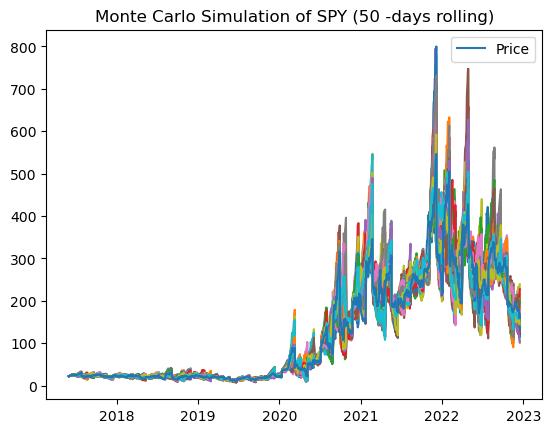

In [172]:
plt.clf()
plt.plot(data.index,data["Adj Close"],label="Price")
for j in range(100):
    plt.plot(data.index,data["Predicted Price"+str(j)])
plt.title("Monte Carlo Simulation of SPY (50 -days rolling)")
plt.legend()